# LAB 3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

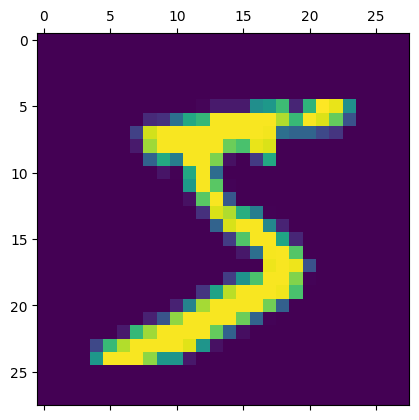

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train = x_train.reshape((60000,28,28,1)).astype("float32")/255
x_test = x_test.reshape((10000,28,28,1)).astype("float32")/255

In [ ]:
"""
model = keras.models.Sequential([
  keras.Input(shape=(28,28,1)),
  keras.layers.Conv2D(32, (3,3), activation="relu"),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(64, (3,3), activation="relu"),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(64, (3,3), activation="relu"),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])
# model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
"""

In [7]:
Inputs = keras.Input(shape=(28,28,1))

In [8]:
x = keras.layers.Conv2D(32, (3,3), activation="relu")(Inputs)
x = keras.layers.MaxPooling2D((2,2))(x)
x = keras.layers.Conv2D(64, (3,3), activation="relu")(x)
x = keras.layers.MaxPooling2D((2,2))(x)
x = keras.layers.Conv2D(64, (3,3), activation="relu")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)


In [9]:
model = keras.models.Model(inputs=Inputs, outputs=outputs)

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

antes estava na ordem dos milhões ... portanto é observável que o modelo convulucional que aplica

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9904 - val_loss: 0.0306
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 35ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9883 - val_loss: 0.0365
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 41ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9910 - val_loss: 0.0299
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9919 - val_loss: 0.0279
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.9961 - loss: 0.0123 - val_accuracy: 0.9913 - val_loss: 0.0296


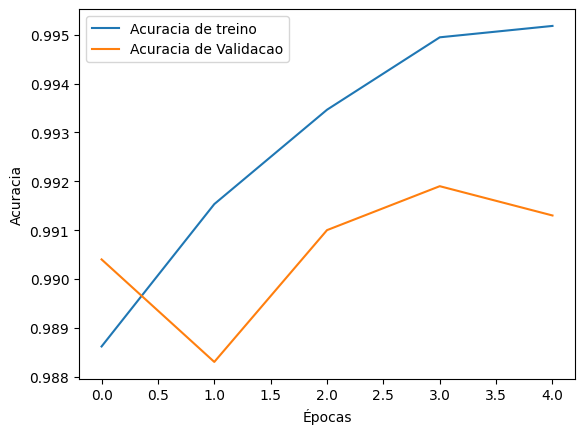

In [17]:
plt.plot(history.history['accuracy'], label='Acuracia de treino')
plt.plot(history.history['val_accuracy'], label='Acuracia de Validacao')
plt.xlabel('Épocas')
plt.ylabel('Acuracia')
plt.legend()
plt.show()

In [18]:
layer_outputs = [layer.output for layer in model.layers[:2]]

In [19]:
layer_outputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor>,
 <KerasTensor shape=(None, 26, 26, 32), dtype=float32, sparse=False, name=keras_tensor_1>]

In [21]:
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [22]:
img = np.expand_dims(x_test[0], axis=0)

In [23]:
img.shape

(1, 28, 28, 1)

In [24]:
activations = activation_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [25]:
activations[0].shape

(1, 28, 28, 1)

In [26]:
activations[1].shape


(1, 26, 26, 32)

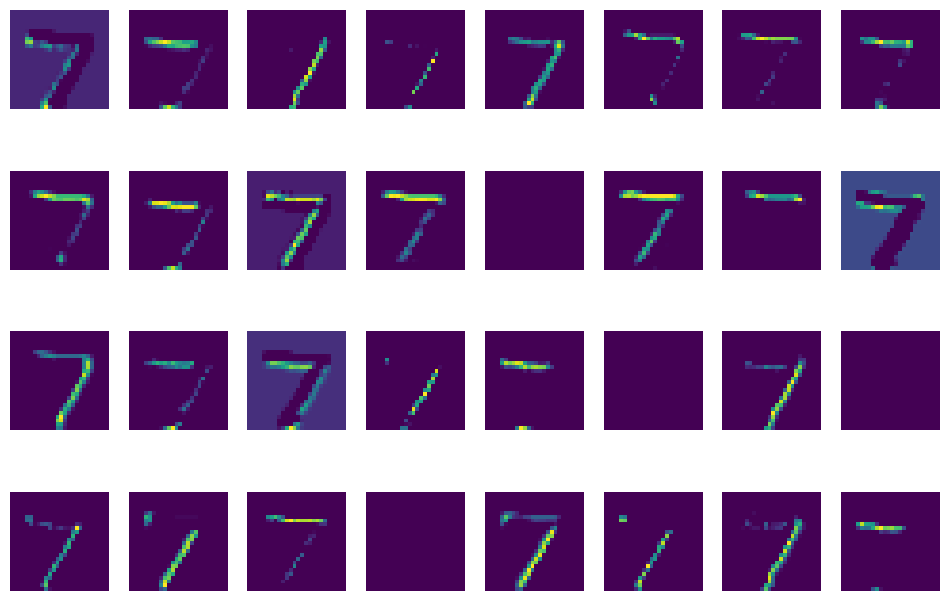

In [31]:
fig,axes = plt.subplots(4,8 , figsize=(12, 8 ))
for i in range(32):
  ax = axes[i//8,i%8]
  ax.matshow(activations[1][0,:,:,i], cmap="viridis")
  ax.axis("off")
plt.show()